# Task
# Sales Prediction using Python
Sales prediction means predicting how much of a product people will buy based on
factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

# Import Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset

In [22]:
df = pd.read_csv("Advertising.csv") 

# Display first few rows

In [23]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Check for missing values

In [24]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


# Drop the unnecessary column if it exists

In [25]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Summary statistics

In [26]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing Data

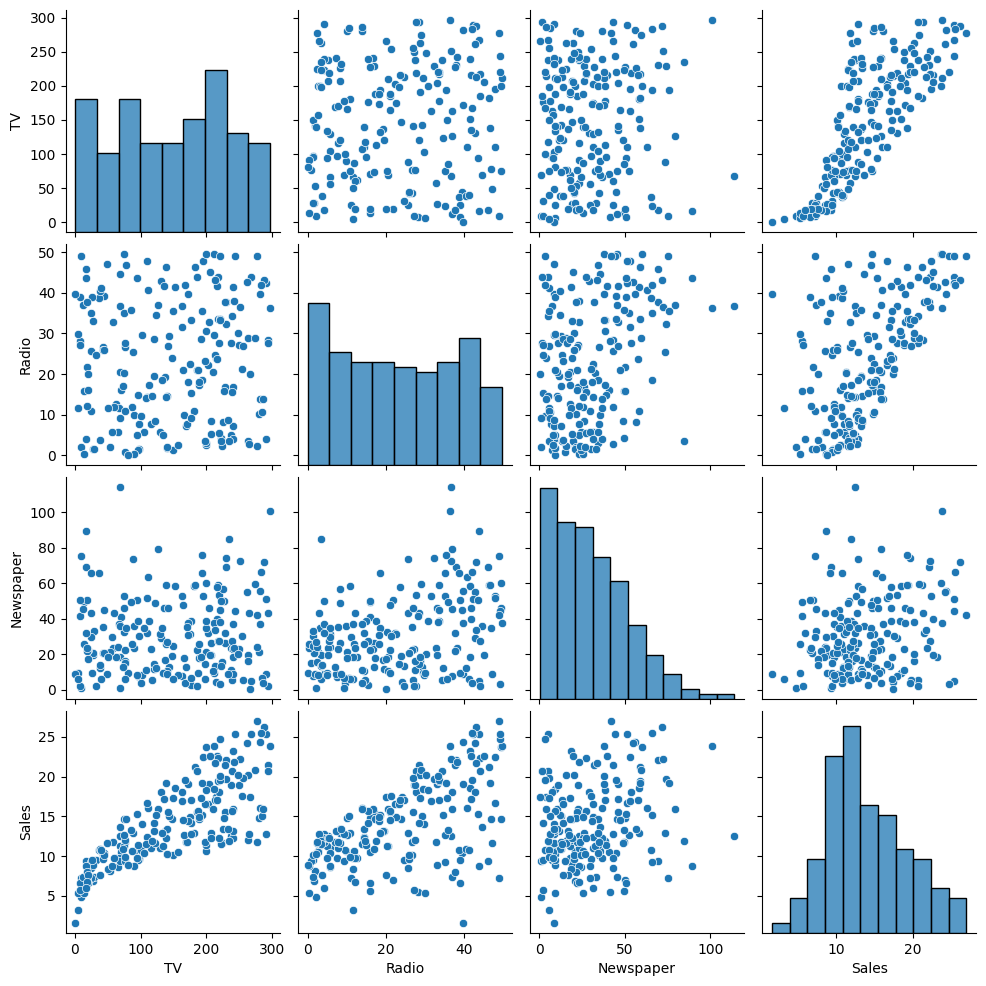

In [27]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

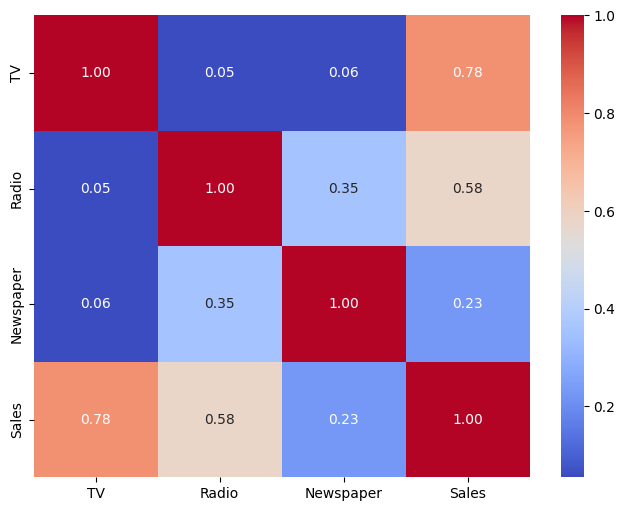

In [28]:
# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Define independent and dependent variables

In [29]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable


# Split data into training and testing sets (80% train, 20% test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Train a Linear Regression Model

In [31]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


 # Evaluate Model Performance

In [33]:
# Predict on test set
y_pred = model.predict(X_test)

In [34]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [35]:
# Print results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
Root Mean Squared Error: 1.78159966153345
R² Score: 0.899438024100912


# Visualizing Predictions

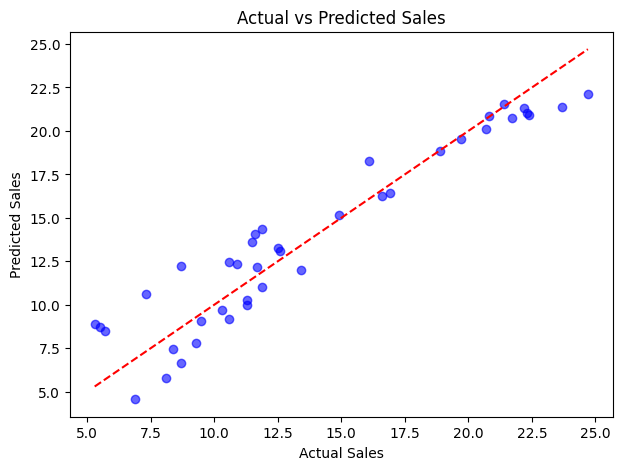

In [36]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [37]:
# Example new data for prediction
new_data = pd.DataFrame({'TV': [200], 'Radio': [50], 'Newspaper': [30]})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]}")


Predicted Sales: 21.467556973825737


# Feature Scaling
If feature magnitudes vary greatly, applying standardization may improve results:

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Random Forest Regressor
Random Forest is great for capturing non-linear patterns in data.

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf}")


Random Forest R² Score: 0.9812814645037053


# Gradient Boosting Regressor
Boosting models often outperform Linear Regression, especially when relationships are non-linear.


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting R² Score: {r2_gb}")


Gradient Boosting R² Score: 0.9831817244706746


# Hyperparameter Tuning
If Random Forest or Gradient Boosting works better, fine-tune hyperparameters using GridSearchCV:

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}


# Polynomial Features (If Data is Non-Linear)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)
print("Polynomial R² Score:", r2_score(y_test, y_pred_poly))


Polynomial R² Score: 0.9869181490609601


# Conclusion: Sales Prediction Model Comparison & Best Approach
After testing multiple machine learning models on the sales dataset, the results indicate that Polynomial Regression achieved the best performance with an R² score of 0.987, followed closely by Gradient Boosting (0.983) and Random Forest (0.981).
Key Findings:
# Polynomial Regression (Best Performance - R² = 0.987)                                                                                                                                                                                                
Captured non-linear relationships effectively.                                                                                                                                                                                                           
Best suited for this dataset due to high accuracy.                                                                                                                                                                                                           
# Gradient Boosting (R² = 0.983) & Random Forest (R² = 0.981)                                                                                                                                                                                              
Performed well but slightly behind Polynomial Regression.
Useful for handling complex patterns with feature importance insights.
# Linear Regression (R² = 0.899)                                                                                                                                                                                                                             
Decent baseline but underperformed compared to advanced models.                                                                                                                                                                                             